Saudi Arabia Used Cars

[Source: Saudi Arabia Used Cars](https://drive.google.com/drive/folders/123QthHe9ECfB1qUFCfDinHibrNhsnZKQ) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

# Business Problem Understanding

# Context

Saudi Arabia Used Cars dataset contains 5624 records of used cars collected from syarah.com. Each row represents a used car. 

Other information regarding each car is the brand name, model, manufacturing year, origin, options, engine capacity, transmission type, mileage that the car covered, region price, and negotiable.

Features
-	Type: Type of used car.
-	Region: The region in which the used car was offered for sale.
-	Make: The company name.
-	Gear_Type: Gear type size of used car.
-	Origin: Origin of used car.
-	Options: Options of used car.
-	Year: Manufacturing year.
-	Engine_Size: The engine size of used car.
-	Mileage: Mileage of used car	
-	Negotiable: True if the price is 0, that means it is negotiable.
-	Price: Used car price.


# Problem Statement

**"Solving problems to have a financially profitable business model for this car showroom in selling used cars, and to provide a positive and comfortable experience for potential car buyers to get used cars at a fair price."**

# Goals

**"Predicting and helping potential buyers in determining the appropriate or accurate price for each used car they want to buy."**

# Analytic Approach

**"Analyzing data to find patterns from the features that exist, which distinguish one car from another.**

**Building a regression model that will help the company provide a correct sales price prediction tool and simultaneously be useful for buyers in determining the right price for used cars in Saudi Arabia they want to buy."**

# Metric Evaluation

In [216]:
#RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi.

#menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear.

# Data Understanding


- The dataset is derived from the listing of used cars for sale in Saudi Arabia via Syarah.com.

- Information about vehicles for sale on Syarah.com is represented by each row of data.



Features
-	Type: Type of used car.
-	Region: The region in which the used car was offered for sale.
-	Make: The company name.
-	Gear_Type: Gear type size of used car.
-	Origin: Origin of used car.
-	Options: Options of used car.
-	Year: Manufacturing year.
-	Engine_Size: The engine size of used car.
-	Mileage: Mileage of used car	
-	Negotiable: True if the price is 0, that means it is negotiable.
-	Price: Used car price.

In [217]:
# Import Library yg dibutuhkan utk eksplorasi Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [218]:
# Load Dataset
df = pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


# Exploratory Data Analysis

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [220]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


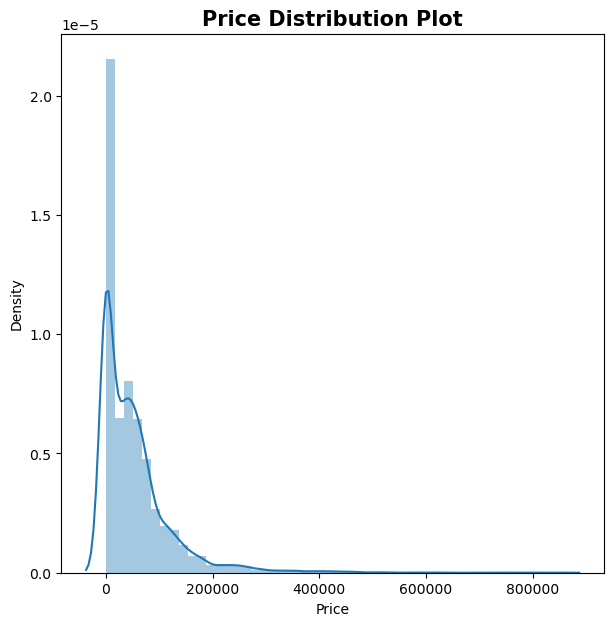

In [221]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['Price'])
plt.title('Price Distribution Plot', size=15, weight='bold');

**Based on the plot of the distribution of used car sales prices in Saudi Arabia, it can be seen that there is a "Right-Skewed Distribution".**
 
**In other words, there is a Positive Skewness in the Price feature.**

In [222]:
print(df.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      5624.000000
mean      53074.058144
std       70155.340614
min           0.000000
25%           0.000000
50%       36500.000000
75%       72932.500000
85%      104275.000000
90%      128850.000000
100%     850000.000000
max      850000.000000
Name: Price, dtype: float64


**Insights:**
- The plot seemed to be 'Right-Skewed', meaning that most prices in the dataset are relatively low ( Below 73.000 ).

- There's a significant difference between the Mean and the Median of the Price Distribution.

- The data points are far spread out from the Mean, which indicates a high variance in the car prices. (85% of the prices are below 130,000, whereas the remaining 15% are between 104.275 and 850.000)

In [223]:
# Buat DF baru

df_model = df.copy()

In [224]:
# Check Data Duplikat
df_model.duplicated().sum()

4

In [225]:
df_model.shape

(5624, 11)

In [226]:
len(df_model)

5624

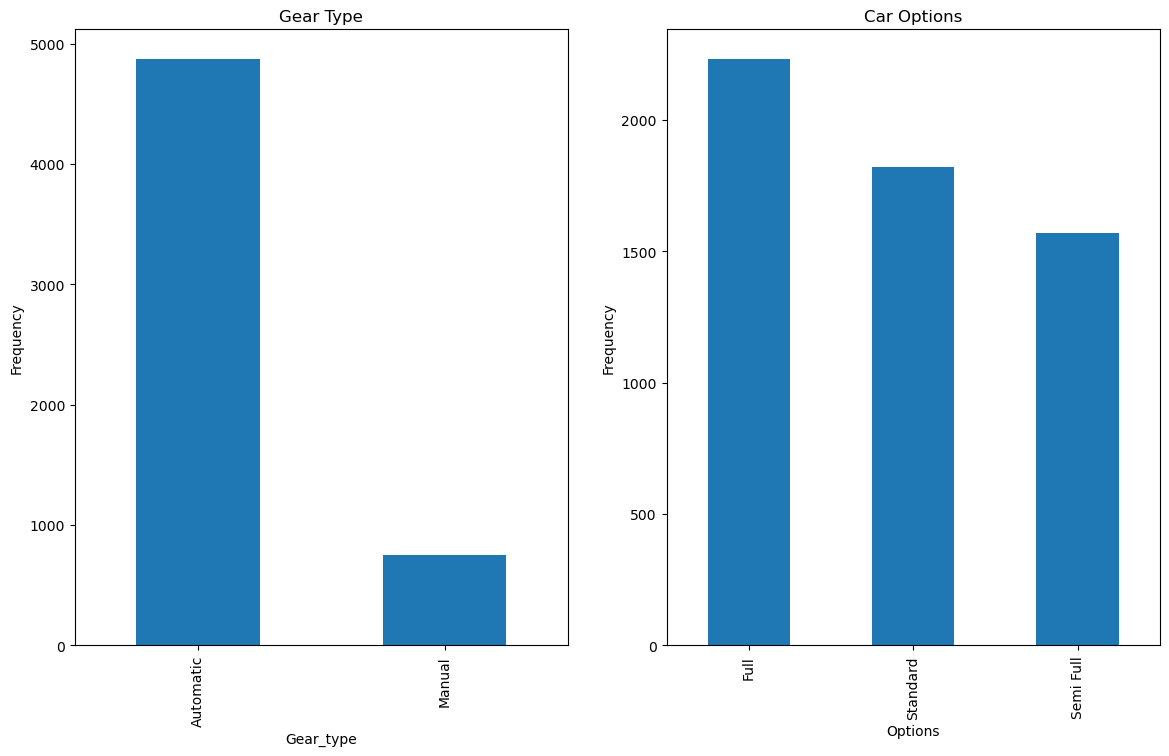

In [227]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt1 = df.Gear_Type.value_counts().plot(kind='bar')
plt.title('Gear Type')
plt1.set(xlabel = 'Gear_type', ylabel='Frequency')

plt.subplot(1,2,2)
plt2 = df.Options.value_counts().plot(kind='bar')
plt.title('Car Options')
plt2.set(xlabel = 'Options', ylabel='Frequency')

plt.show()

## **Insights:**
    - The number of used cars with Gear Type 'Automatic' is significantly higher compared to 'Manual' cars.
    
    - The 'Full' vehicle option appears to be more preferred for car sales than other options.

In [228]:
# Check how many Used Cars sold based on regions
print(f"Total Used Cars sold by Regions:\n{df['Region'].value_counts()}")

Total Used Cars sold by Regions:
Riyadh            2272
Dammam             925
Jeddah             733
Qassim             225
Al-Medina          214
Al-Ahsa            166
Aseer              163
Makkah             153
Taef               103
Tabouk              97
Khobar              76
Abha                64
Jazan               60
Hail                58
Jubail              56
Najran              42
Hafar Al-Batin      39
Al-Baha             35
Yanbu               27
Al-Jouf             27
Arar                22
Besha               16
Qurayyat            13
Al-Namas            12
Wadi Dawasir        12
Sakaka              10
Sabya                4
Name: Region, dtype: int64


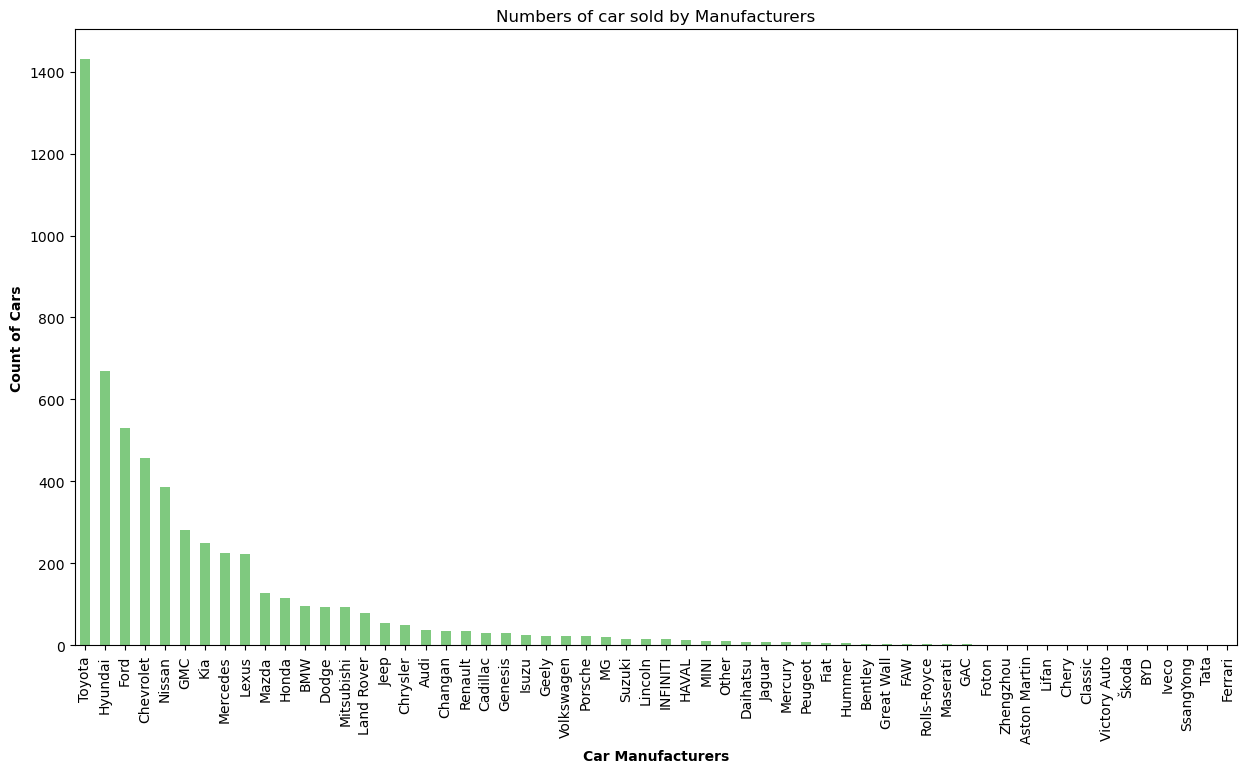

In [229]:
# Visualizing the different car company names available

plt.rcParams['figure.figsize'] = [15,8]

ax = df['Make'].value_counts().plot(kind='bar', colormap='Accent')
ax.set_title('Numbers of car sold by Manufacturers')
ax.set_xlabel("Car Manufacturers", fontweight='bold')
ax.set_ylabel("Count of Cars", fontweight='bold')

plt.show()


## **Insights:**
    - Toyota, Hyundai, and Ford are among the best seller as used cars

    - SSangyong, Tata, and Ferrari are the least sold as used cars

In [230]:
print(f"\nUsed Cars sold by Brand:\n{df['Make'].value_counts()}")
print(f"\nUsed Cars sold by Gear Type:\n{df['Gear_Type'].value_counts()}") 


Used Cars sold by Brand:
Toyota          1431
Hyundai          670
Ford             530
Chevrolet        458
Nissan           387
GMC              282
Kia              251
Mercedes         226
Lexus            222
Mazda            129
Honda            115
BMW               97
Dodge             95
Mitsubishi        94
Land Rover        79
Jeep              56
Chrysler          50
Audi              38
Changan           36
Renault           35
Cadillac          31
Genesis           31
Isuzu             25
Geely             24
Volkswagen        23
Porsche           22
MG                21
Suzuki            16
Lincoln           16
INFINITI          15
HAVAL             14
MINI              11
Other             10
Daihatsu           9
Jaguar             9
Mercury            9
Peugeot            8
Fiat               7
Hummer             5
Bentley            4
Great Wall         4
FAW                4
Rolls-Royce        3
Maserati           3
GAC                3
Foton              2
Zhengzho

**Most of the used cars for sale are located in Riyadh, with the most commonly sold car brand being Toyota and the gear type dominated by Automatic.**

In [231]:
import matplotlib.ticker as ticker

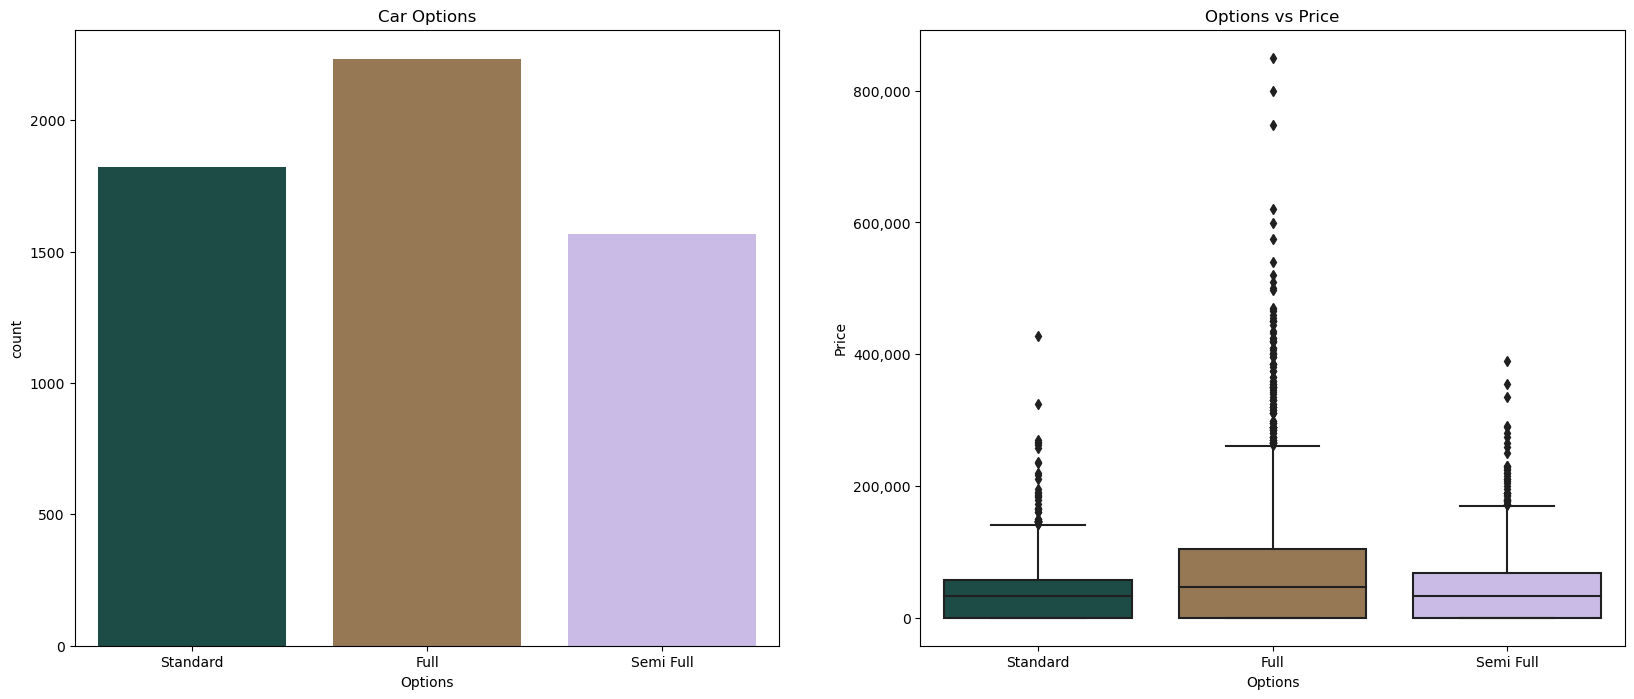

In [232]:
#Relation between Car Options and Price

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(df.Options, palette=("cubehelix"))
plt.title('Car Options')

plt.subplot(1,2,2)
sns.boxplot(x=df.Options, y=df.Price, palette=("cubehelix"))
plt.title('Options vs Price')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()


**'Full Options' cars has higher spread out in price compared to the other options.**

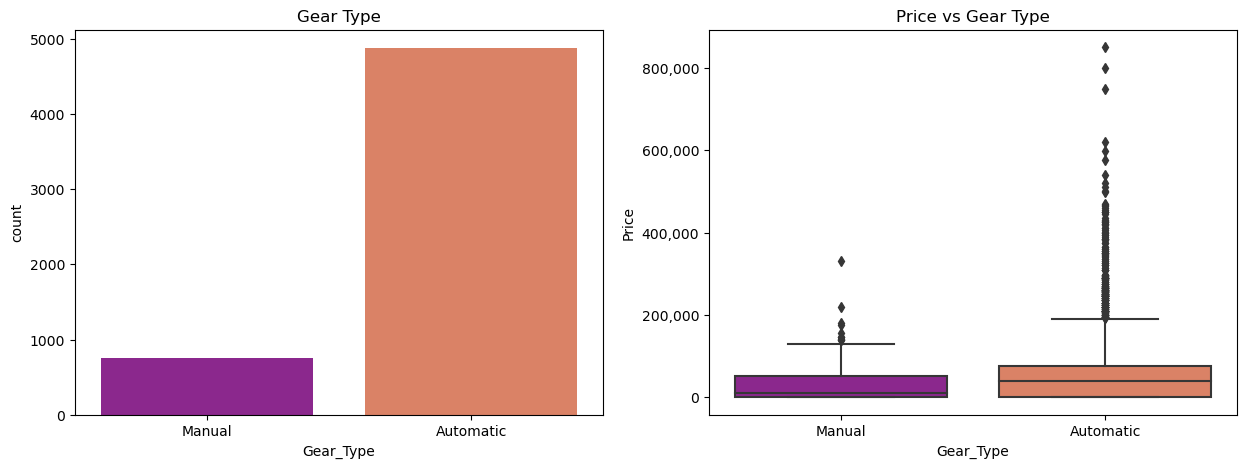

In [233]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(df.Gear_Type, palette=("plasma"))
plt.title('Gear Type')

plt.subplot(1,2,2)
sns.boxplot(x=df.Gear_Type, y=df.Price, palette=("plasma"))
plt.title('Price vs Gear Type')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()


## **Only few `Manual` cars are being sold. Furthermore, the average price of Manual and Automatic cars `differs` significantly.**

In [234]:
# Used Cars Grouping based on Region
df.groupby(['Region', 'Make'])['Make'].count().sort_values(ascending=False)


Region   Make      
Riyadh   Toyota        491
         Hyundai       327
Dammam   Toyota        251
Riyadh   Ford          211
         Chevrolet     197
                      ... 
Makkah   Bentley         1
         Changan         1
Al-Baha  Mitsubishi      1
Makkah   Chrysler        1
Abha     BMW             1
Name: Make, Length: 466, dtype: int64

## **In the Riyadh area, the most commonly sold used cars are those with the brand Toyota, followed by Hyundai.**

## **Then in the Dammam area, the most commonly sold used cars are those with the brand Toyota.**

<Figure size 2000x800 with 0 Axes>

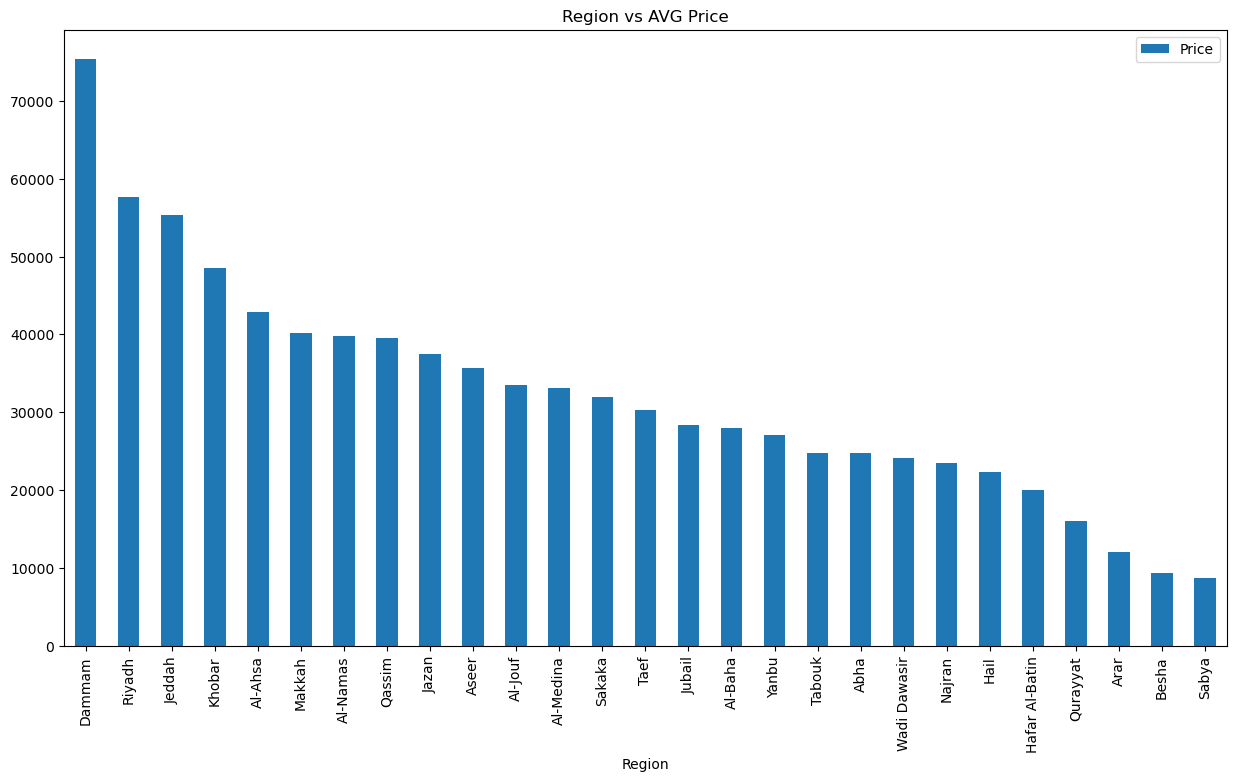

In [235]:
plt.figure(figsize=(20,8))

df_rp = pd.DataFrame(df.groupby(['Region'])['Price'].mean().sort_values(ascending= False))
df_rp.plot.bar()
plt.title('Region vs AVG Price')
plt.show()

In [236]:
# Median Price by Regions Check
df_median_price = df.groupby(by=['Region']).agg({'Price':'median'}).reset_index()
df_median_price = df_median_price.set_index('Region')
df_median_price = df_median_price.sort_values('Price', ascending=False)
df_median_price.head()

,Price
Region,
Dammam,55000.0
Riyadh,42000.0
Jeddah,38000.0
Al-Ahsa,37750.0
Al-Namas,36000.0


## **Dammam, Riyadh, and Jeddah cities where the cars are mostly sold**

<Figure size 2500x600 with 0 Axes>

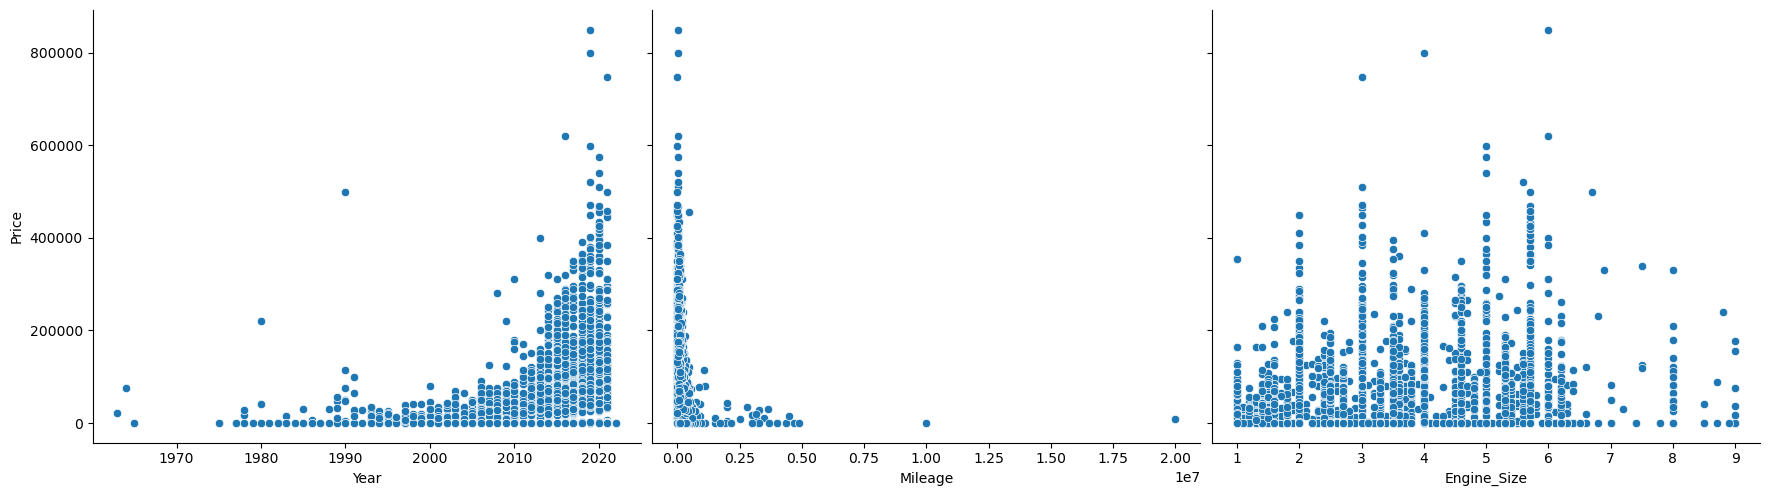

In [237]:
plt.figure(figsize=(25, 6))
sns.pairplot(df, x_vars=['Year', 'Mileage', 'Engine_Size'], y_vars='Price',size=5, aspect= 1.2, kind= 'scatter')
plt.show()

## **Inference:**
    - 'Year' of manufacturing seems to have a positive correlation with Price, which is expected.

    - 'Mileage' appears to have a negative correlation with df_median_price

    - 'Engine_Size' have a weak correlation with the price

<Figure size 2000x600 with 0 Axes>

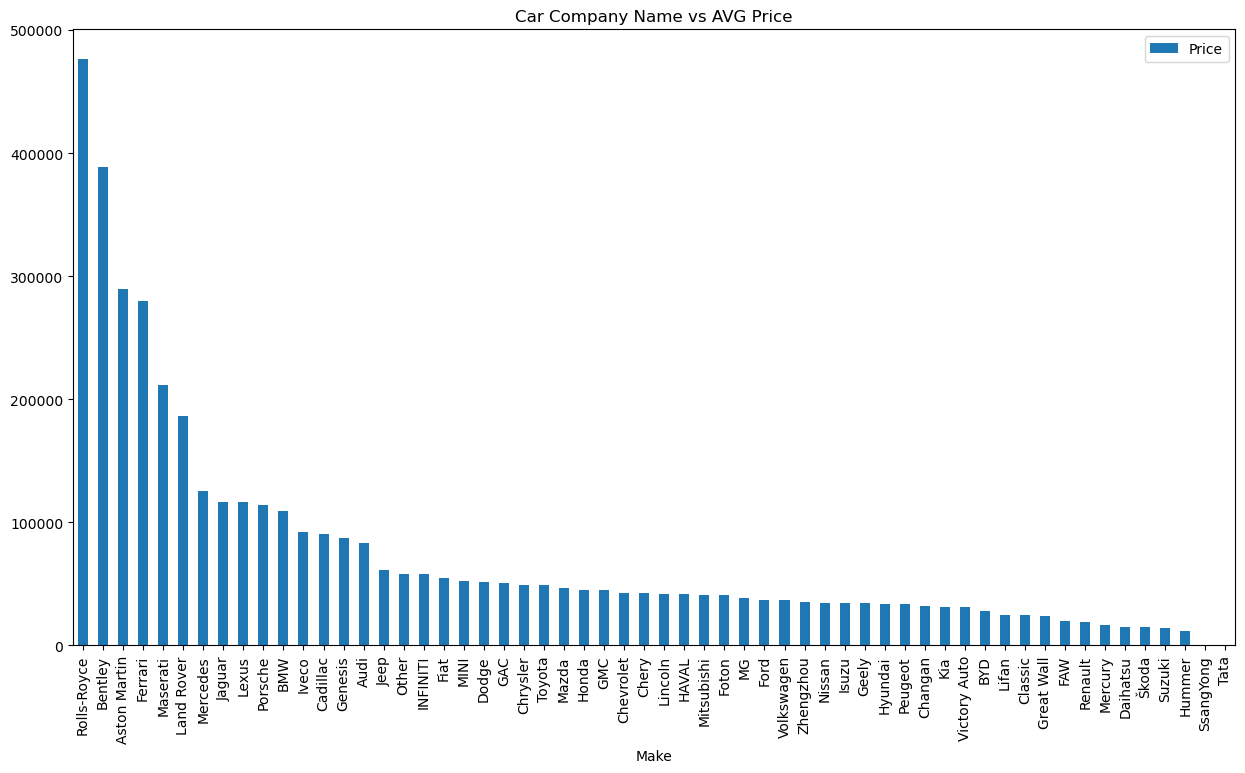

In [238]:
plt.figure(figsize=(20, 6))

df_bp = pd.DataFrame(df.groupby(['Make'])['Price'].mean().sort_values(ascending=False))
df_bp.plot.bar()
plt.title('Car Company Name vs AVG Price')
plt.show()

## **Insights:**
    - Rolls-Royce, Bentley, and Aston Martin have the Highest AVG Price 

    - Ssangyong and Tata are the Cheapest Sold Cars

Make,Aston Martin,Audi,BMW,BYD,Bentley,Cadillac,Changan,Chery,Chevrolet,Chrysler,...,Renault,Rolls-Royce,SsangYong,Suzuki,Tata,Toyota,Victory Auto,Volkswagen,Zhengzhou,Škoda
Region,,,,,,,,,,,,,,,,,,,,,
Abha,NaN,NaN,34000.0,NaN,NaN,NaN,NaN,NaN,49500.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
Al-Ahsa,NaN,NaN,192450.0,NaN,NaN,56500.0,31000.0,NaN,12000.0,70000.0,...,1128.0,NaN,NaN,0.0,NaN,15000.0,NaN,27000.0,NaN,NaN
Al-Baha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87500.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,35000.0,NaN
Al-Jouf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
Al-Medina,NaN,40000.0,63000.0,28000.0,NaN,41000.0,NaN,NaN,7000.0,NaN,...,NaN,NaN,NaN,22000.0,NaN,0.0,NaN,0.0,NaN,NaN
Al-Namas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,70000.0,NaN,NaN,NaN,NaN
Arar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
Aseer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29000.0,23000.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
Besha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


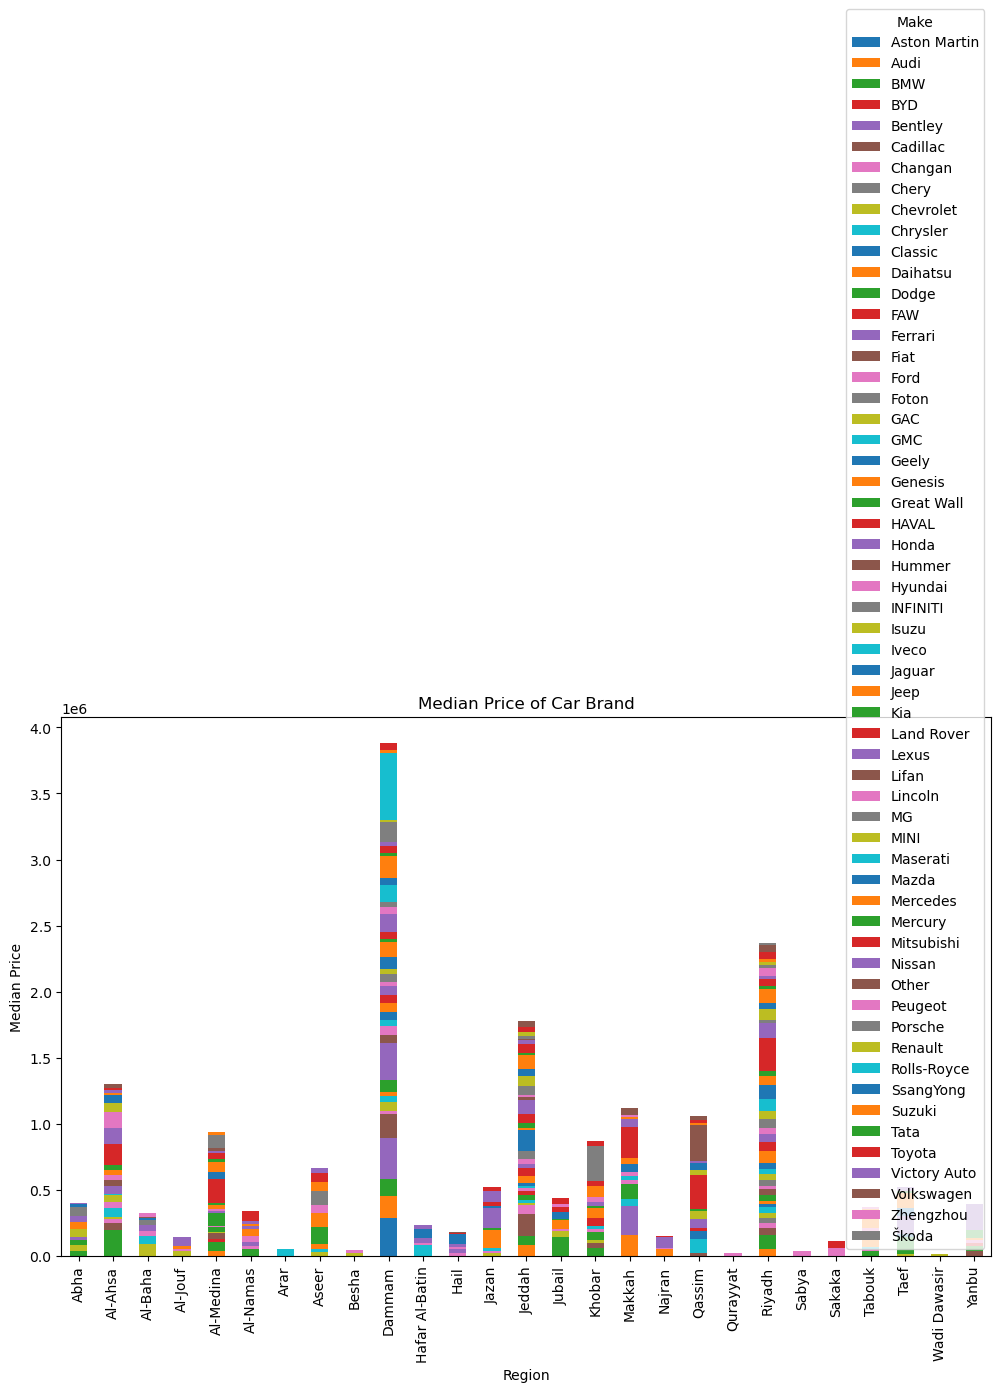

In [239]:
from IPython.display import display

neighbour_pivot = df.pivot_table(index='Region', columns='Make', values='Price', aggfunc= 'median')
display(neighbour_pivot)

pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Region')
pivot_plot.set_ylabel('Median Price')
pivot_plot.set_title('Median Price of Car Brand')
plt.tight_layout()
plt.show()

## **Insight: Dammam Region has Highest Median Price by Brand**

Gear_Type,Automatic,Manual
Region,,
Abha,1010.0,0.0
Al-Ahsa,40500.0,0.0
Al-Baha,15000.0,0.0
Al-Jouf,13000.0,0.0
Al-Medina,22500.0,0.0
Al-Namas,30000.0,45000.0
Arar,0.0,42500.0
Aseer,16500.0,0.0
Besha,0.0,0.0


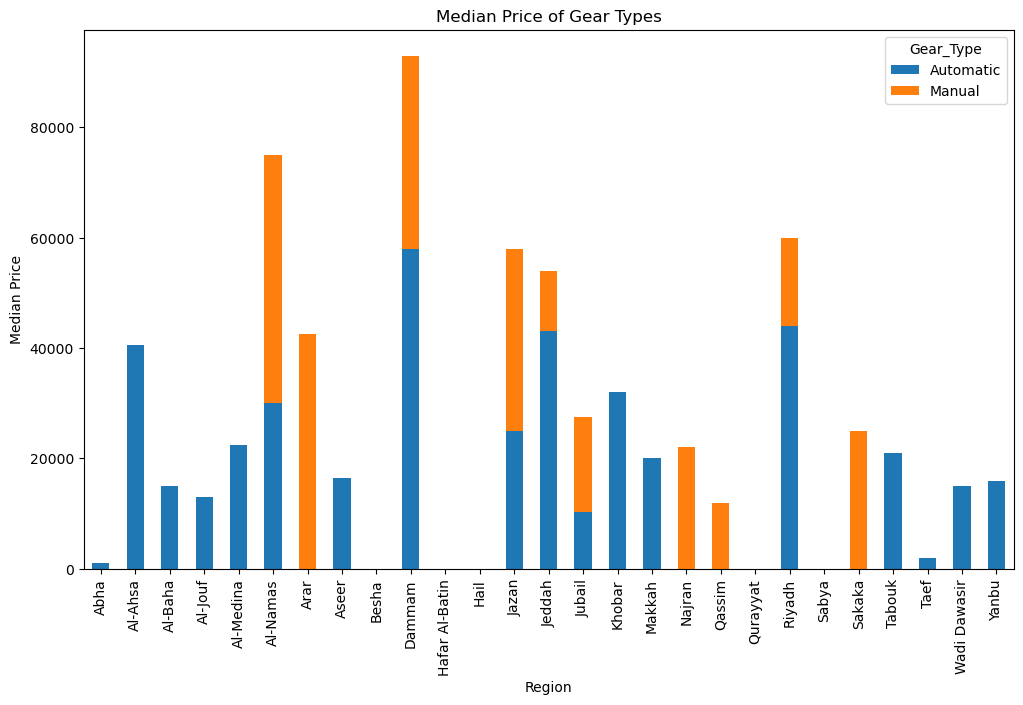

In [240]:
## **Gear Type Median Price by Region**

from IPython.display import display
neighbour_pivot = df.pivot_table(index='Region', columns='Gear_Type', values= 'Price', aggfunc='median')
display(neighbour_pivot)

pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Region')
pivot_plot.set_ylabel('Median Price')
pivot_plot.set_title('Median Price of Gear Types');

## **Insight: The Dammam region has the highest median price for each gear type of used vehicles being sold, with the Automatic gear type reaching 2 times the price for manual type cars.**

Gear_Type,Automatic,Manual
Make,,
Aston Martin,290000.0,NaN
Audi,70750.0,NaN
BMW,80000.0,NaN
BYD,28000.0,NaN
Bentley,265000.0,NaN
Cadillac,50000.0,NaN
Changan,34750.0,NaN
Chery,42500.0,NaN
Chevrolet,32000.0,7500.0


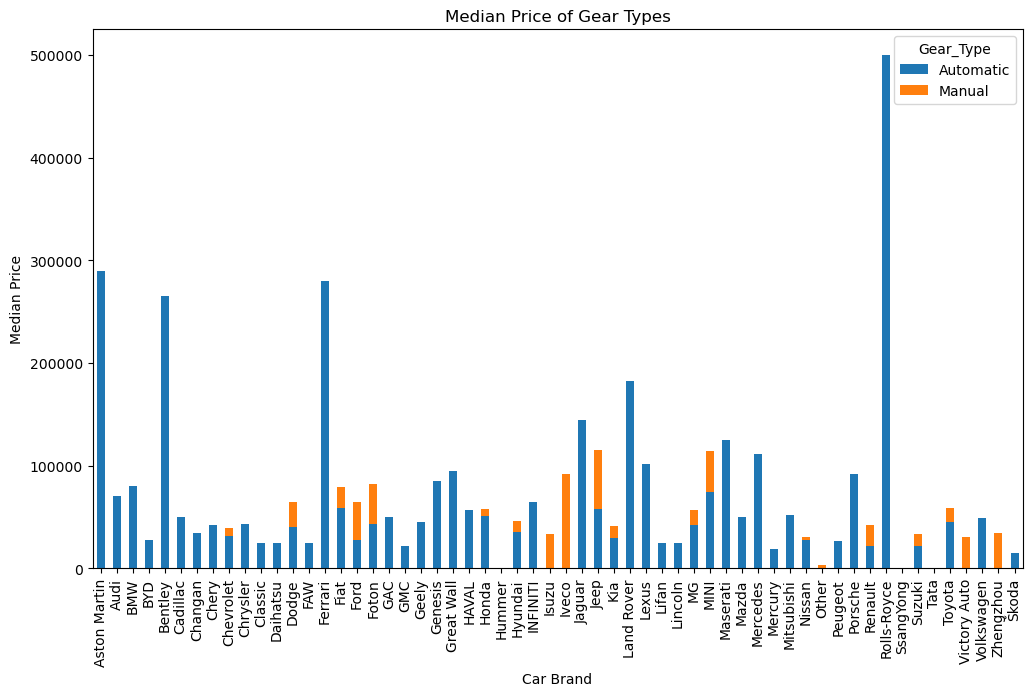

In [241]:
# Gear Types Median Price Plot by Brand
from IPython.display import display

neighbour_pivot = df.pivot_table(index='Make', columns='Gear_Type', values='Price', aggfunc='median')
display(neighbour_pivot)

pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Car Brand')
pivot_plot.set_ylabel('Median Price')
pivot_plot.set_title('Median Price of Gear Types');

## **Insight: Cars with the brand Rolls-Royce have the highest median price compared to other car brands, especially for the vehicle gear type 'Automatic' which dominates the plot above.**

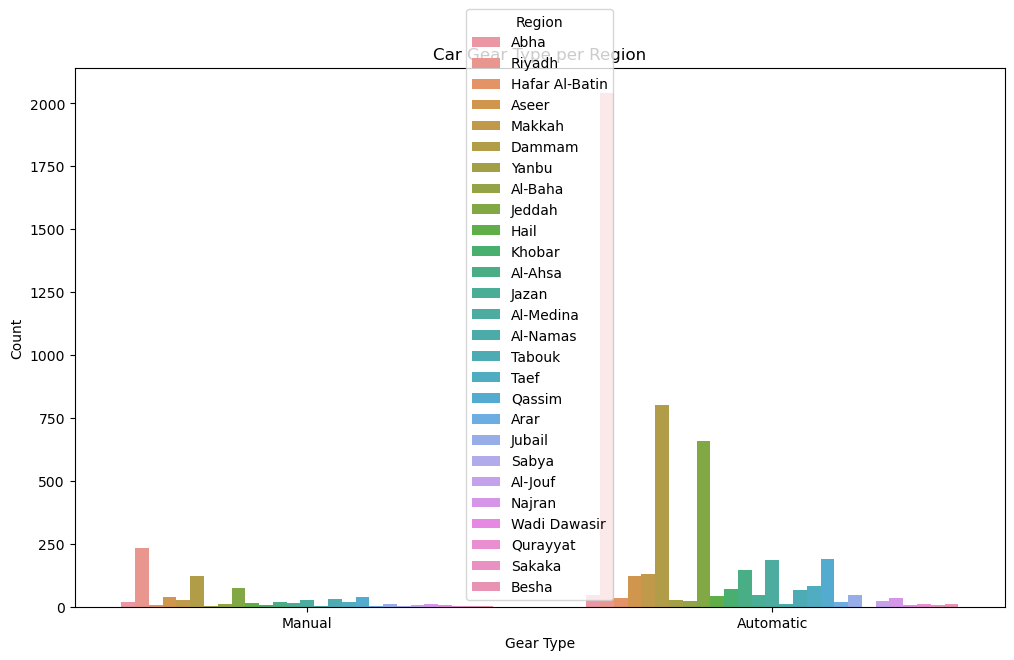

In [242]:

## **Spread of Gear Type by Region
plt.figure(figsize=(12,7))
sns.countplot(x='Gear_Type', hue='Region', data=df)
plt.title('Car Gear Type per Region')
plt.xlabel('Gear Type')
plt.ylabel('Count')
plt.show()

## **Insight: The plot above confirms that the 'Automatic' gear type dominates the used car sales distribution in Saudi Arabia compared to the 'Manual' gear type.**

**Data Splitting**

In [243]:
# Perlu Stratify / ga?
# Konsiderasi ny apa?
# Method ny apa utk make sure?

In [244]:
from sklearn.model_selection import train_test_split

In [245]:
# Split data into features and target variables
X = df_model.drop(columns=['Price']) # Features
y = df_model['Price'] # Target variable

In [246]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

# **Preprocessing**

In [247]:
# Kolom 'Negoatiable' tdk berdampak signifikan utk Analisis, jd akan dibuang 
df_model =df_model.drop(['Negotiable'], axis=1)

# Kolom 'Mileage' dengan nilai 9999999 dan 20000000 tidak perlu utk analisis, jd akan dibuang 
df_model = df_model[(df_model['Mileage'] != 9999999)&(df_model['Mileage'] != 20000000)]
df_model.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,0


In [248]:
# Statistics Summary untk Numerical Feature

num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,Year,Engine_Size,Mileage,Price
count,5622.000000,5622.000000,5.622000e+03,5622.000000
mean,2014.108324,3.294895,1.456409e+05,53091.338136
std,5.777359,1.513909,2.433893e+05,70161.784561
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2013.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.959142e+05,72977.500000
max,2022.000000,9.000000,4.900000e+06,850000.000000


Dpt dilihat dr Fitur diatas ada ketidakwajaran showroom mobil bekas menjual dengan harga 0 alias GRATIS.


Maka dari itu, data yg memiliki nilai Price = 0 akan kita drop

In [249]:
# Statistics Summary utk Categorical Var
df_model.describe(exclude='number')

,Type,Region,Make,Gear_Type,Origin,Options
count,5622,5622,5622,5622,5622,5622
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2271,1431,4875,4188,2232


Dapat dilihat dr Fitur diatas, Fitur Type didominasi oleh 'Land Cruiser'
utk penjualan terbanyak mobil bekas, serta info seputar fitur-fitur lainnya.

In [250]:
# Make Sure Row Price value '0'
df_model[df_model.Price == 0]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,0
...,...,...,...,...,...,...,...,...,...,...
5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,0
5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,0
5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,0
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,0


In [251]:
# Checking Price Rows represented as '1'
df_model[df_model.Price == 1]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3131,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,1


In [252]:
# Dropping Price rows equal to zero and equal to one
df_model = df_model[(df_model['Price'] != 0) & (df_model['Price'] != 1)]

In [253]:
df_model

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


## **Checking the values in Price column. Sort by Ascending Order**

In [254]:
df_model.sort_values(by='Price', ascending=1, inplace=True)
df_model.head(20)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3992,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,500
4399,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,850
5128,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,884
3474,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6,85000,950
3760,5,Al-Ahsa,MG,Automatic,Saudi,Standard,2020,1.5,41000,988
3616,Elantra,Jeddah,Hyundai,Automatic,Saudi,Standard,2019,2.0,89000,993
1534,Yukon,Jeddah,GMC,Automatic,Saudi,Standard,2021,5.3,4000,1000
3892,Corolla,Hail,Toyota,Automatic,Saudi,Standard,2020,1.6,48563,1002
46,Elantra,Abha,Hyundai,Automatic,Saudi,Semi Full,2020,2.0,27000,1010
5424,Yaris,Najran,Toyota,Automatic,Saudi,Full,2018,1.5,169000,1046


In [255]:
# Checking Duplicates
df_model.duplicated().sum()

3

In [256]:
df_model.drop_duplicates(inplace=True)

In [257]:
df_model.duplicated().sum()

0

## **DROP COLUMNS** <br>
There are certain considerations that need to be taken into account before dropping a column or feature. At the initial stage, we can use domain knowledge to decide which features may not be relevant.

- Based on domain knowledge, features such as 'Type', 'Region', and 'Origin' are not relevant or important for predictive analysis.

- The 'Negotiable' feature is also not necessary for building a predictive model. Therefore, these features can be dropped from the dataset to simplify the analysis and reduce dimensionality. However, it is important to carefully consider and evaluate the impact of dropping these features, as they may still provide valuable information or affect the accuracy of the predictive model. It is always a good practice to test the model performance with and without the dropped features to see the impact on the model's accuracy.

In [258]:
# Drop several unnecessary Columns
df_model.drop(['Make', 'Type', 'Region', 'Origin'], axis=1, inplace=True)

In [259]:
# Checking Dataset Info
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3822 entries, 3992 to 3513
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gear_Type    3822 non-null   object 
 1   Options      3822 non-null   object 
 2   Year         3822 non-null   int64  
 3   Engine_Size  3822 non-null   float64
 4   Mileage      3822 non-null   int64  
 5   Price        3822 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 209.0+ KB


## **'Type', 'Region', 'Origin', and 'Negotiable' Columns already DROPPED**

## **Missing Value**

In [260]:
# Checking Missing Value
df_model.isnull().sum()

Gear_Type      0
Options        0
Year           0
Engine_Size    0
Mileage        0
Price          0
dtype: int64

## **From the Output Above there's no Missing Value from Saudi Arabia Used Cars anymore**


In [261]:
display(df.head(2))
display(df_model.head(2))

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000


,Gear_Type,Options,Year,Engine_Size,Mileage,Price
3992,Automatic,Semi Full,2018,3.8,170000,500
4399,Automatic,Standard,2018,1.5,100000,850


In [262]:
# Rechecking Info Dataset
df_model.isna().sum()

Gear_Type      0
Options        0
Year           0
Engine_Size    0
Mileage        0
Price          0
dtype: int64

In [263]:
# Checking Rent Price with 0 Value
df_model[df_model['Price'] == 0]['Price'].count()

0

## **We have rechecked the dataset used, and no missing values were found. Additionally, there are no longer any data points with Price = 0. This means that the dataset has been successfully preprocessed and can proceed to the next stage of analysis.**

## **DATA CORRELATION**

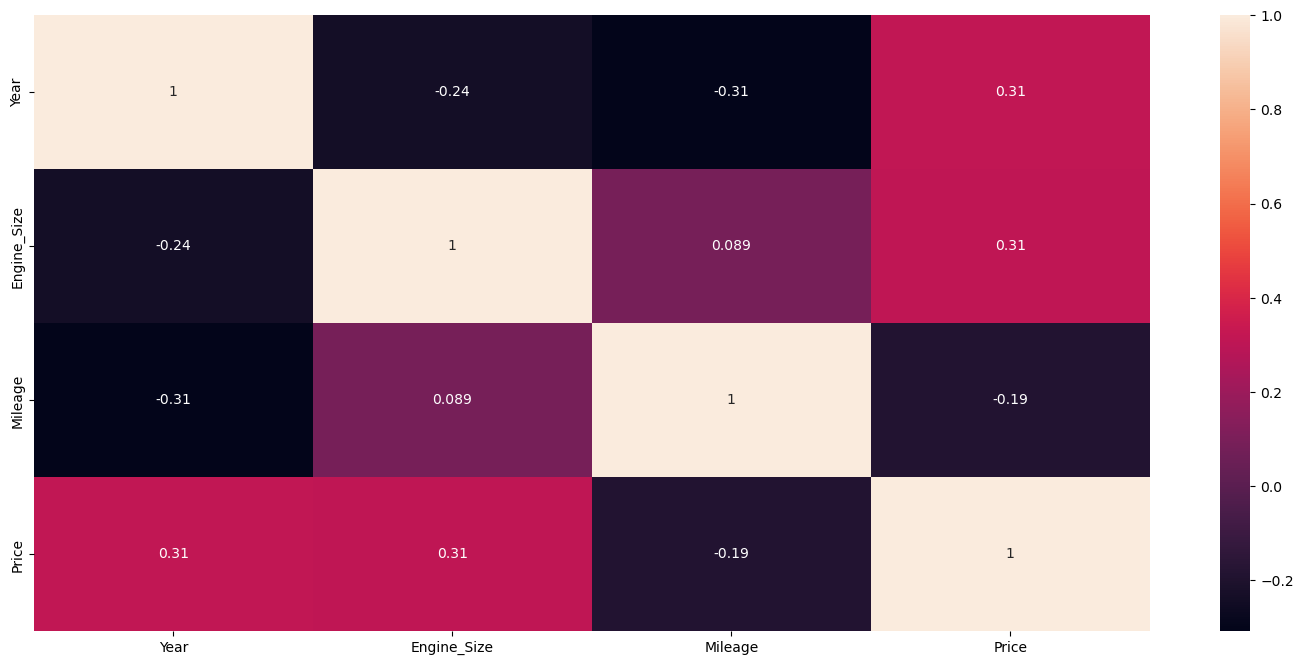

In [264]:
# Checking Correlation Coefficient to see which variables are highly correlated

import seaborn as sns
plt.figure(figsize=(18,8))
sns.heatmap(df_model.corr(), annot=True)
plt.show()

In [265]:
# Alternative way to calculate the correlation
df_model.corr()['Price'].sort_values() # Price as Target Var

Mileage       -0.189764
Engine_Size    0.308709
Year           0.314478
Price          1.000000
Name: Price, dtype: float64

## ** From the Heatmap** <br>
    - The correlation matrix shows that no feature has a strong correlation with the price feature.
    - However, we can see that the Year and Engine_Size are positively correlated with the Price, while Mileage is negatively correlated.

Next, we will check the data distribution and outliers for each numerical feature. If the distribution has high skewness, one way to reduce it is by performing feature engineering on each feature.

## **Outliers Detection**

## **The number of outliers in the data can significantly affect the analysis and modeling results. There are several things to consider before deciding on the appropriate treatment for the data, including considering domain knowledge.**

**Domain knowledge can help in identifying whether outliers are expected or unexpected, and whether they are likely to affect the analysis or modeling results. It can also help in understanding the context of the data and determining appropriate thresholds for identifying outliers.**

**In some cases, outliers may be removed or treated by replacing them with more appropriate values, such as using the mean or median of the data. However, it is important to carefully consider the impact of removing or treating outliers, as they may contain valuable information or affect the accuracy of the analysis or modeling results.**

**Additionally, it is important to note that not all outliers should be treated equally, and that different treatments may be appropriate for different types of outliers. It is important to evaluate the impact of different treatments on the data and the resulting analysis or modeling results.**

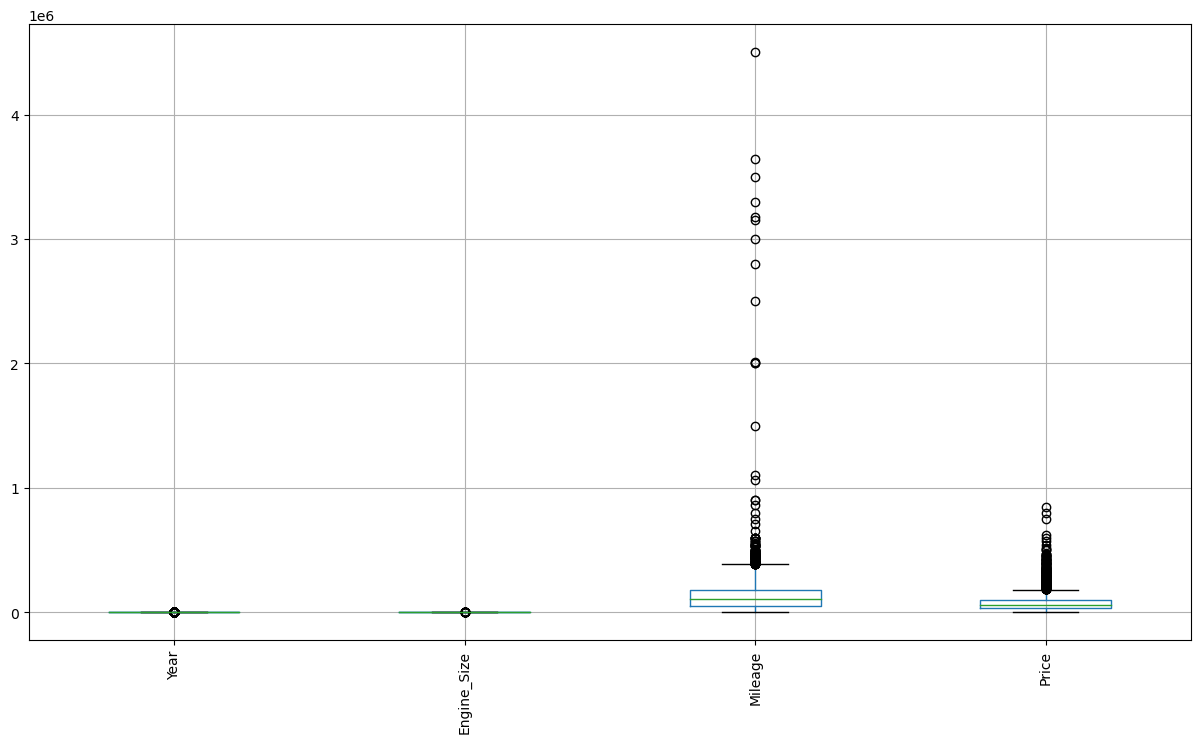

In [266]:
# Boxplot to check Outliers
df_model.boxplot(rot=90);

**There appear to be many outliers in some features such as Mileage. In this project, to create a cleaner dataset from outliers, I will perform some data engineering on the features by considering the combination of the results from the IQR method and domain knowledge.**

**The resulting model will be limited to predicting new listings within the range of data based on this 'clean dataset' only. Any data points outside the range will cause bias in the model's predictions.**

**It's important to keep in mind that removing outliers can have consequences on the accuracy and robustness of the model. Depending on the nature of the data, removing outliers could significantly impact the overall distribution and skewness of the data, and thus change the model's assumptions and predictions**.

**Therefore, it is recommended to carefully evaluate the impact of removing outliers and to consider other strategies such as transforming the data or using robust regression techniques that are more tolerant to outliers**.

In [267]:
# Function to check Outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 -q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    lower_limit = q1 - limit
    upper_limit = q3 + limit
    print(f'lower_limit: {lower_limit}')
    print(f'upper_limit: {upper_limit}')

In [268]:
# Outliers on Price Features
find_anomalies(df_model['Price'])

IQR: 59750.0
lower_limit: -54625.0
upper_limit: 184375.0


In [269]:
# Outliers on Mileage Features
find_anomalies(df_model['Mileage'])

IQR: 134943.5
lower_limit: -154415.25
upper_limit: 385358.75


In [270]:
# Outliers on Engine_Size Features
find_anomalies(df_model['Engine_Size'])

IQR: 2.0
lower_limit: -1.0
upper_limit: 7.0


In [271]:
# Outliers on Year Features
find_anomalies(df_model['Year'])

IQR: 5.0
lower_limit: 2005.5
upper_limit: 2025.5


## **FEATURE ENGINEERING**

In [272]:
# Checking Price Column Statistics Descriptive
df_model['Price'].describe()

count      3822.000000
mean      78057.716379
std       72747.693707
min         500.000000
25%       35000.000000
50%       58000.000000
75%       94750.000000
max      850000.000000
Name: Price, dtype: float64

In [273]:
# Checking if Price > $182500
df_model[df_model['Price'] > 182500.0].count()['Price']

261

## **It appears that 75% of the data in the price column is less than 94000, while the maximum value is 850000. 

**There is a noticeable skewness in the distribution, with a long tail on the right side (positive skewness). There are 261 data points with a price value greater than 182500 (upper limit based on the IQR method).** 

**Therefore, data points with a price greater than 182500 will not be included in the modeling, which will reduce the skewness. This will certainly be a limitation for the model that will be built.**

**It is important to keep in mind that this limitation may affect the accuracy and generalization ability of the model, particularly if there are important trends or patterns in the high price range that are not captured in the data.**

**Therefore, it may be beneficial to consider alternative approaches for dealing with the skewness and outliers, such as transforming the data or using robust regression techniques that are more tolerant to outliers. Additionally, it may be useful to gather more data points that are representative of the high price range to improve the overall quality of the model.**

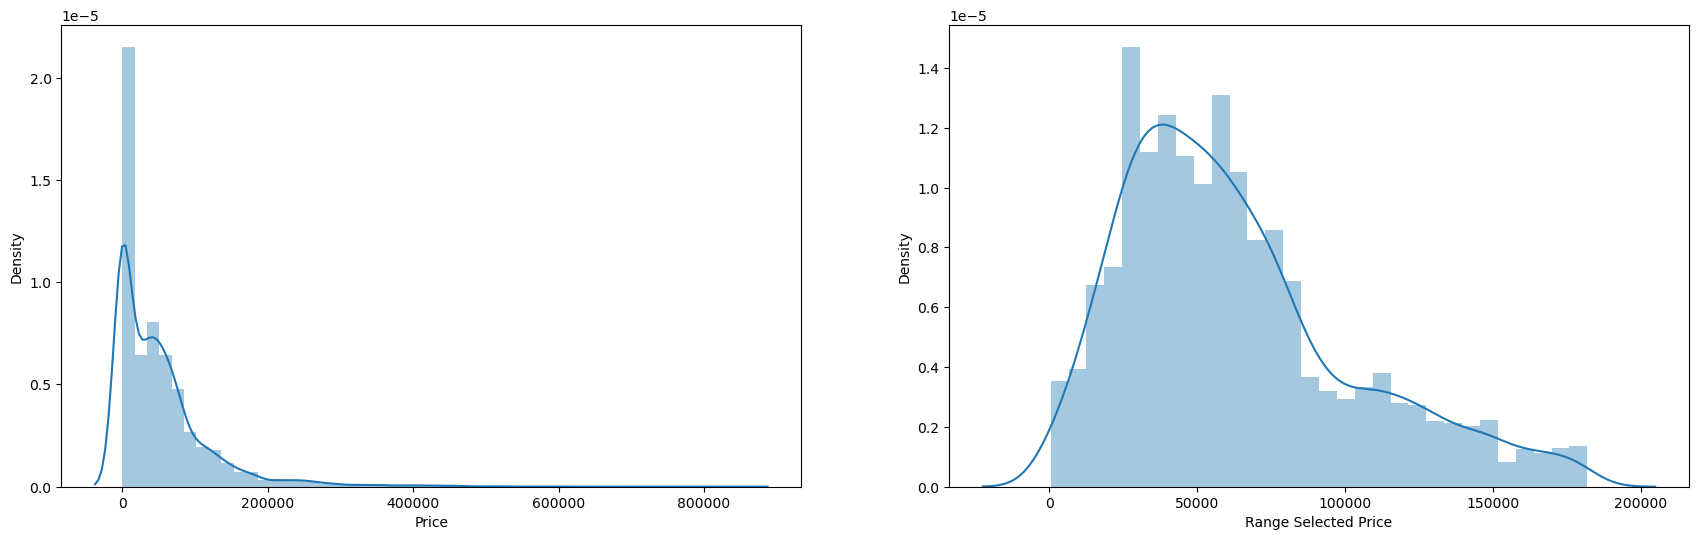

In [274]:
# Data Filtering
df_model = df_model[(df_model['Price'] <= 182500)]

# Plot Distribution BEFORE & AFTER Filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Price'], ax=axes[0])
sns.distplot(df_model['Price'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price');

In [275]:
# Checking 'Price' Column Descriptive Statistic AFTER Filtering
df_model['Price'].describe()

count      3561.000000
mean      62901.205279
std       39315.364636
min         500.000000
25%       35000.000000
50%       55000.000000
75%       81500.000000
max      182000.000000
Name: Price, dtype: float64

# **Engine_Size**

In [276]:
df_model['Engine_Size'].describe()

count    3561.000000
mean        3.108734
std         1.436356
min         1.000000
25%         2.000000
50%         2.700000
75%         4.000000
max         9.000000
Name: Engine_Size, dtype: float64

In [277]:
# Checking Engine_Size>7
df_model[df_model['Engine_Size'] > 7].count()['Engine_Size']

26

**It appears that 75% of the data in the Engine_Size column is less than 4, while the maximum value is 9.**
**There is a noticeable skewness in the distribution, with a long tail on the right side (positive skewness).**
**There are 26 data points with an Engine_Size value greater than 7 (upper limit based on the IQR method).**
**Therefore, data points with an Engine_Size greater than 7 will not be included in the modeling, which will reduce the skewness.**
**This will certainly be a limitation for the model that will be built.**

**It is important to keep in mind that this limitation may affect the accuracy and generalization ability of the model, particularly if there are important trends or patterns in the high Engine_Size range that are not captured in the data. Therefore, it may be beneficial to consider alternative approaches for dealing with the skewness and outliers, such as transforming the data or using robust regression techniques that are more tolerant to outliers. Additionally, it may be useful to gather more data points that are representative of the high Engine_Size range to improve the overall quality of the model.**

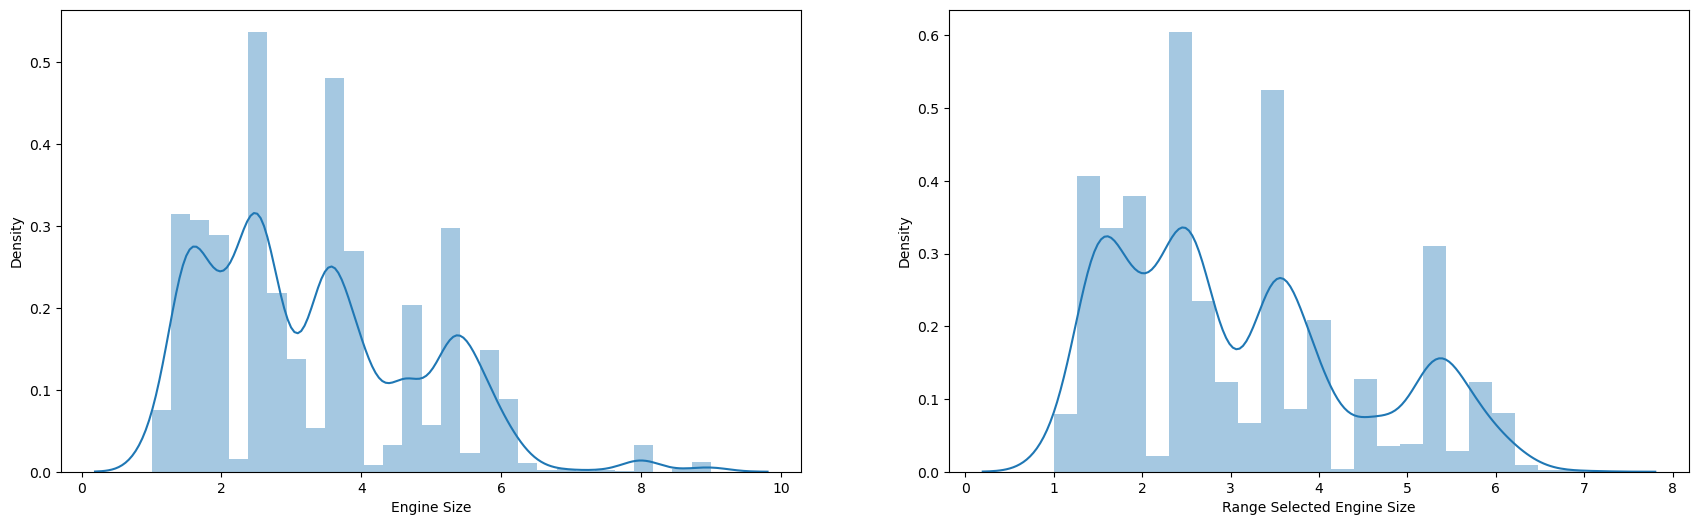

In [278]:
# Data Filtering
df_model = df_model[(df_model['Engine_Size'] <= 7)]

# Data Distribution Plot BEFORE & AFTER Filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Engine_Size'], ax=axes[0])
sns.distplot(df_model['Engine_Size'], ax=axes[1])
axes[0].set_xlabel('Engine Size')
axes[1].set_xlabel('Range Selected Engine Size');


In [279]:
# Checking Statistic Descriptive  from 'Engine_Size' Column AFTER Filtering
df_model['Engine_Size'].describe()

count    3535.000000
mean        3.071231
std         1.372478
min         1.000000
25%         2.000000
50%         2.700000
75%         4.000000
max         7.000000
Name: Engine_Size, dtype: float64

## **MILEAGE**

In [280]:
df_model['Mileage'].describe()

count    3.535000e+03
mean     1.436684e+05
std      2.060139e+05
min      1.000000e+02
25%      5.400000e+04
50%      1.080000e+05
75%      1.900000e+05
max      4.500000e+06
Name: Mileage, dtype: float64

In [281]:
# Checking Milegae Value > 385500
df_model[df_model['Mileage'] > 385500].count()['Mileage']

129

**It appears that 75% of the data in the Mileage column is less than 1.900000e+05, while the maximum value is 4.500000e+06. There is a noticeable skewness in the distribution, with a long tail on the right side (positive skewness). There are 129 data points with a Mileage value greater than 385500 (upper limit based on the IQR method). Therefore, data points with a Mileage greater than 385500 will not be included in the modeling, which will reduce the skewness. This will certainly be a limitation for the model that will be built.**

**It is important to keep in mind that this limitation may affect the accuracy and generalization ability of the model, particularly if there are important trends or patterns in the high Mileage range that are not captured in the data. Therefore, it may be beneficial to consider alternative approaches for dealing with the skewness and outliers, such as transforming the data or using robust regression techniques that are more tolerant to outliers. Additionally, it may be useful to gather more data points that are representative of the high Mileage range to improve the overall quality of the model.**

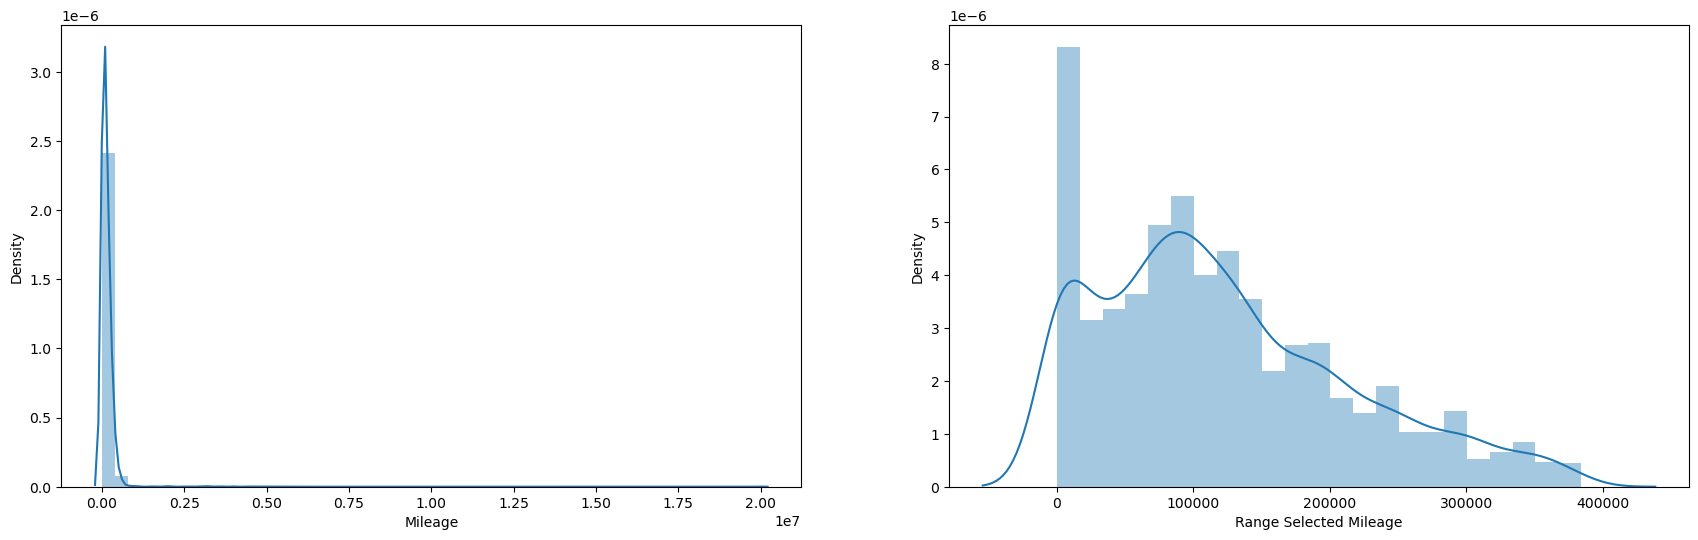

In [282]:
# Data Filtering
df_model = df_model[df_model['Mileage'] < 385500]

# Data Distribution Plot BEFORE & AFTER Filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Mileage'], ax=axes[0])
sns.distplot(df_model['Mileage'], ax=axes[1])
axes[0].set_xlabel('Mileage')
axes[1].set_xlabel('Range Selected Mileage');

## **YEAR**

**Although the upper limit based on the IQR method for the 'Year' feature is 25.5, there are no data points with values greater than 2025.5. Therefore, the data that will be included are the 'Year' feature values that are less than or equal to 2025.5.**


In [283]:
# Checking Statistic Descriptive from Year Column
df_model['Year'].describe()

count    3406.000000
mean     2014.953024
std         4.824877
min      1963.000000
25%      2014.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: Year, dtype: float64

In [284]:
# Checking Year > $2025.5
df_model[df_model['Year'] > 2025.5].count()['Year']

0

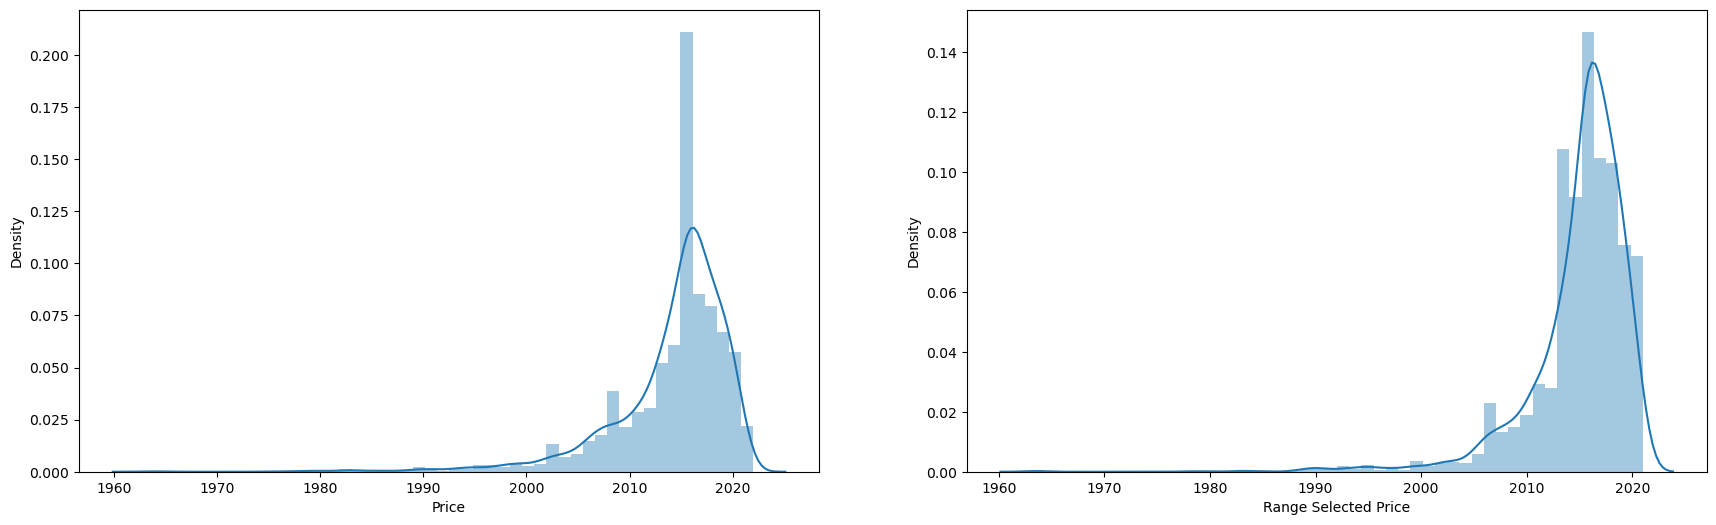

In [285]:
# Data Filtering
df_model = df_model[(df_model['Year'] <= 2025.5)]

# Data Distribution PLot BEFORE & AFTER Filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Year'], ax=axes[0])
sns.distplot(df_model['Year'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price');


In [286]:
# Checking Statistic Descriptive from 'Year' Column
df_model['Year'].describe()

count    3406.000000
mean     2014.953024
std         4.824877
min      1963.000000
25%      2014.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: Year, dtype: float64

## **Gear_Type**

In [287]:
# Checking Statistic Descriptive from Gear_Type Column
df_model['Gear_Type'].describe()

count          3406
unique            2
top       Automatic
freq           3055
Name: Gear_Type, dtype: object

## **Options**

In [288]:
# Checking Statistic Descriptive form 'Options' Column
df_model['Options'].describe()

count         3406
unique           3
top       Standard
freq          1267
Name: Options, dtype: object

## **CLEANING DATASET**

In [289]:
df_model

,Gear_Type,Options,Year,Engine_Size,Mileage,Price
3992,Automatic,Semi Full,2018,3.8,170000,500
4399,Automatic,Standard,2018,1.5,100000,850
5128,Automatic,Standard,2019,1.4,55500,884
3474,Automatic,Standard,2019,1.6,85000,950
3760,Automatic,Standard,2020,1.5,41000,988
...,...,...,...,...,...,...
2852,Automatic,Full,2020,3.5,5000,180000
4725,Automatic,Full,2017,2.0,20000,180000
1662,Automatic,Full,2015,5.7,119000,180000
2522,Automatic,Full,2019,3.6,16000,181000


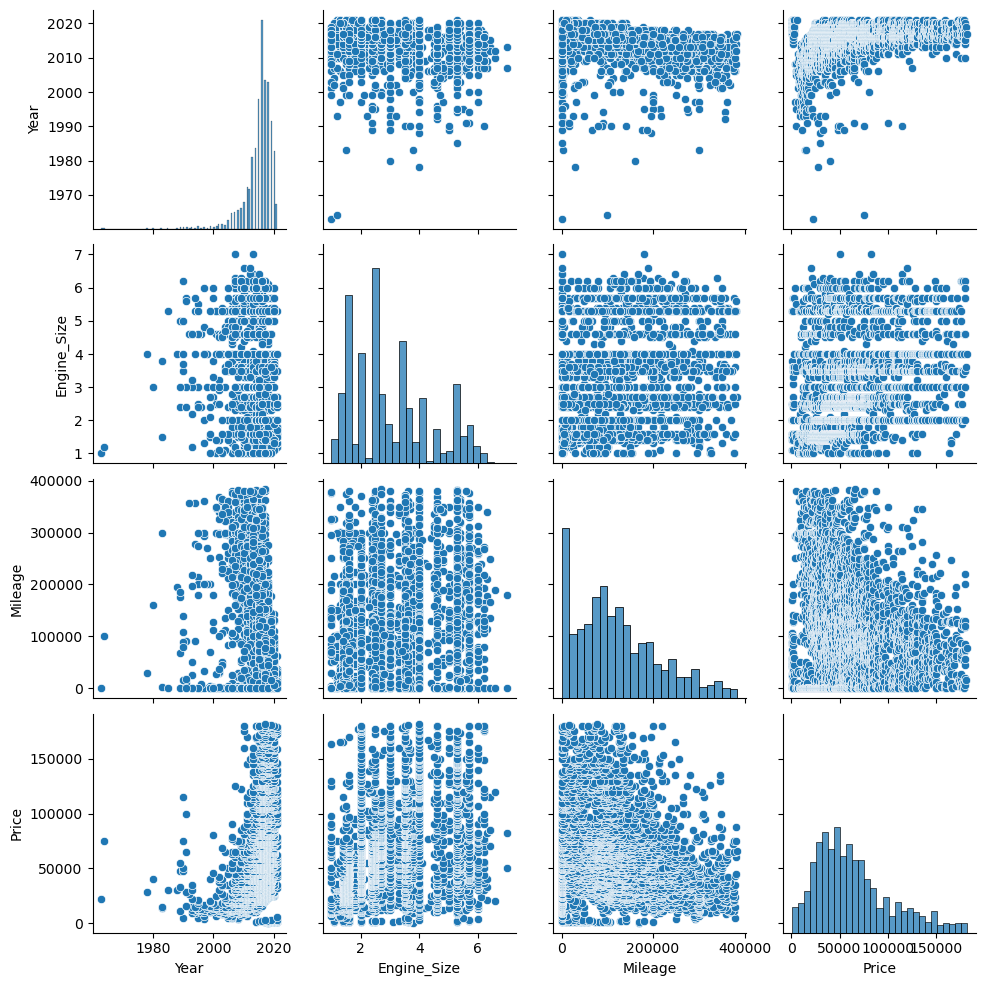

In [290]:
# Dataset Plot Relation
sns.pairplot(df_model)
plt.show()

## **MODELLING**

In [291]:
# Importing Librarty for Modelling


In [292]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## **ENCODING**


**To be able to use all the selected features, categorical features must be transformed into numerical features.** 

**We can use Column Transformer to change the data type, which can then be applied to the model pipeline.**

In [294]:
# CAT Features into NUM Features

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Gear_Type']),
    ('Ordinal', ce.OrdinalEncoder(), ['Options'])
], remainder='passthrough')

In [295]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot', OneHotEncoder(drop='first'),
                                 ['Gear_Type']),
                                ('Ordinal', OrdinalEncoder(), ['Options'])])

## **DATA SPLITTING**

In [296]:
# Splitting Independent Variable Data from Target
X = df_model.drop(['Price'], axis=1)
y = df_model['Price']

In [297]:
display(X)
display(y)

,Gear_Type,Options,Year,Engine_Size,Mileage
3992,Automatic,Semi Full,2018,3.8,170000
4399,Automatic,Standard,2018,1.5,100000
5128,Automatic,Standard,2019,1.4,55500
3474,Automatic,Standard,2019,1.6,85000
3760,Automatic,Standard,2020,1.5,41000
...,...,...,...,...,...
2852,Automatic,Full,2020,3.5,5000
4725,Automatic,Full,2017,2.0,20000
1662,Automatic,Full,2015,5.7,119000
2522,Automatic,Full,2019,3.6,16000


3992       500
4399       850
5128       884
3474       950
3760       988
         ...  
2852    180000
4725    180000
1662    180000
2522    181000
2605    182000
Name: Price, Length: 3406, dtype: int64

## **TRAIN & TEST SPLITTING**

In [298]:
# Splitting Training Data & Test with 70:30 Proporsion
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

In [299]:
X_train, X_test, y_train, y_test

(      Gear_Type    Options  Year  Engine_Size  Mileage
 4917     Manual  Semi Full  1999          2.7      375
 1666  Automatic   Standard  2021          2.5    10000
 2692  Automatic       Full  2004          3.0   230000
 2868  Automatic  Semi Full  2020          4.0     3000
 780   Automatic   Standard  2017          6.0    75000
 ...         ...        ...   ...          ...      ...
 3538  Automatic  Semi Full  2019          1.5    11000
 2097  Automatic  Semi Full  2007          5.0   303000
 957   Automatic   Standard  2019          1.4    56000
 3169  Automatic   Standard  2010          6.0      244
 5451  Automatic  Semi Full  2016          2.4      260
 
 [2384 rows x 5 columns],
       Gear_Type    Options  Year  Engine_Size  Mileage
 3746  Automatic   Standard  2018          2.5    56000
 880   Automatic  Semi Full  2014          2.7    21000
 2852  Automatic       Full  2020          3.5     5000
 3366  Automatic   Standard  2017          1.4   102000
 1019     Manual  Se

## **CHOOSE BENCHMARK MODEL**

In [300]:
X_train.shape

(2384, 5)

In [301]:
y_train.shape

(2384,)

In [314]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

[-31774.68387906 -32274.06971713 -34362.07606288 -28478.9076744
 -35064.91481399] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-22050.8662368  -21644.84034702 -23865.29948529 -19451.81561978
 -23722.64554632] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.37438267 -1.7199367  -0.86946627 -0.62419659 -1.06173426] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-28816.93458345 -30532.78827698 -29896.6320383  -28268.68226779
 -33065.15042165] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-19370.70313627 -20432.18517637 -20133.32472515 -18975.92735979
 -22328.51398049] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
 

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-32390.930429,2312.269269,-22147.093447,1610.008498,-1.129943,0.383699
1,KNN Regressor,-30116.037518,1674.483606,-20248.130876,1163.050431,-1.102866,0.363133
2,DecisionTree Regressor,-33829.085008,1780.833340,-22073.444796,956.626704,-1.122498,0.370550
3,RandomForest Regressor,-28402.945698,1140.971738,-18368.036037,617.618637,-1.021135,0.338687
4,XGBoost Regressor,-30128.219110,1215.769531,-19630.477574,880.656982,-1.036612,0.396416


**There is a significant difference between the RMSE and MAE values, where the RMSE value is higher because the residuals or errors are squared before being averaged. This causes RMSE to give more weight to larger errors. In other words, there are large error values generated by all of the algorithms used, resulting in a significant difference between the RMSE and MAE values.**

**Based on the RMSE value, the RandomForest Regressor is the best model. However, based on the MAE and MAPE values, RandomForest has the lowest values.**

**Next, predictions will be made on the test set using the 2 best benchmark models, XGBoost and RandomForest.***

## **PREDICT TEST SET WITH BENCHMARK MODEL**

**PREDICTION ON TEST SET USING XGBOOST MODEL & RANDOM FOREST**

In [303]:
# 2 OF THE BEST BENCHMARK
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# TEST SET PREDICTION
for i in models:
    
    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models [i])
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,27052.137878,18213.369512,1.173971
RandomForest,26368.436214,17528.880223,1.215307


## **HYPERPARAMETER TUNING**

**Since the XGBoost model does not have significantly different performance from the Random Forest, we will continue to use this XGBoost model as the final model. At this stage, we will perform hyperparameter tuning on the XGBoost model with the hope of improving its performance.**

**For a guide on tuning the XGBoost model, you can refer to the Tuning XGBoost documentation.**

In [304]:
# Tree Depth
max_depth = list(np.arange(1, 11))

# Learning Rate
learning_rate = list(np.arange(1, 100)/100)

# Tree Estimators
n_estimators = list(np.arange(100, 201))

# Tree Rows (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Tree Features(% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [305]:
# Hyperparameter Tuning using Benchmark Model
xgb = XGBRegressor(random_state=1, verbosity=0)

# Algorithm Chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter Tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [306]:
# Fitting Data Training to find the Best Parameter
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['Options'])])),
                                             ('scaler', StandardScaler()),
                                            

In [307]:
# Displaying Tuning Results in Dataframe. Sort by RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
17,0.274005,0.009509,0.007008,0.002676,0.6,0.001,190,5,0.04,9,...,952.435865,1,-1.524567,-1.780355,-0.888439,-0.581458,-1.272358,-1.209435,0.430491,2
7,0.297190,0.020914,0.007212,0.001345,0.9,0.059948,119,8,0.05,5,...,824.098944,2,-1.523432,-1.719316,-0.891514,-0.589414,-1.262878,-1.197311,0.411386,1
24,0.117806,0.009812,0.007592,0.003021,0.9,10.0,146,4,0.06,5,...,785.994408,3,-1.543640,-1.839485,-0.934105,-0.621067,-1.277394,-1.243138,0.431179,4
0,0.118133,0.003043,0.011572,0.005716,0.7,0.007743,144,2,0.68,10,...,777.815229,6,-1.576169,-1.846169,-0.920023,-0.619012,-1.368372,-1.265949,0.443074,9
42,0.095420,0.015298,0.005705,0.001480,0.3,3.593814,118,6,0.18,6,...,690.814384,5,-1.549352,-1.835255,-0.933596,-0.640406,-1.377406,-1.267203,0.428627,10


In [308]:
# Checking Best Score & Params
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -25460.96278247842
Best_params: {'model__subsample': 0.6, 'model__reg_alpha': 0.001, 'model__n_estimators': 190, 'model__max_depth': 5, 'model__learning_rate': 0.04, 'model__gamma': 9, 'model__colsample_bytree': 0.9}


## **Predict Test Set with Tuned Model**
**Predicting on Test Set using XGBOOST Model & chosen Hyperparameter**

In [309]:
# XGBoost Model
model = {'XGB': XGBRegressor(random_state=1)}

# Define Model using Best Estimator
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Saving Metrics Value RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,24853.304817,16679.626051,1.190208


## **Performance Comparison**

**Comparing XGBOOST Performance Model BEFORE & AFTER Hyperparameter Tuning**

In [316]:
# BEFORE HYPERPARAMETER TUNING
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,27052.137878,18213.369512,1.173971


In [317]:
# AFTER HYPERPARAMETER TUNING
score_after_tuning

,RMSE,MAE,MAPE
XGB,24853.304817,16679.626051,1.190208


**Conclusion: The model experienced a performance improvement (lower RMSE, MAE, and MAPE) with the hyperparameter tuning, even though it was only a slight improvement.**

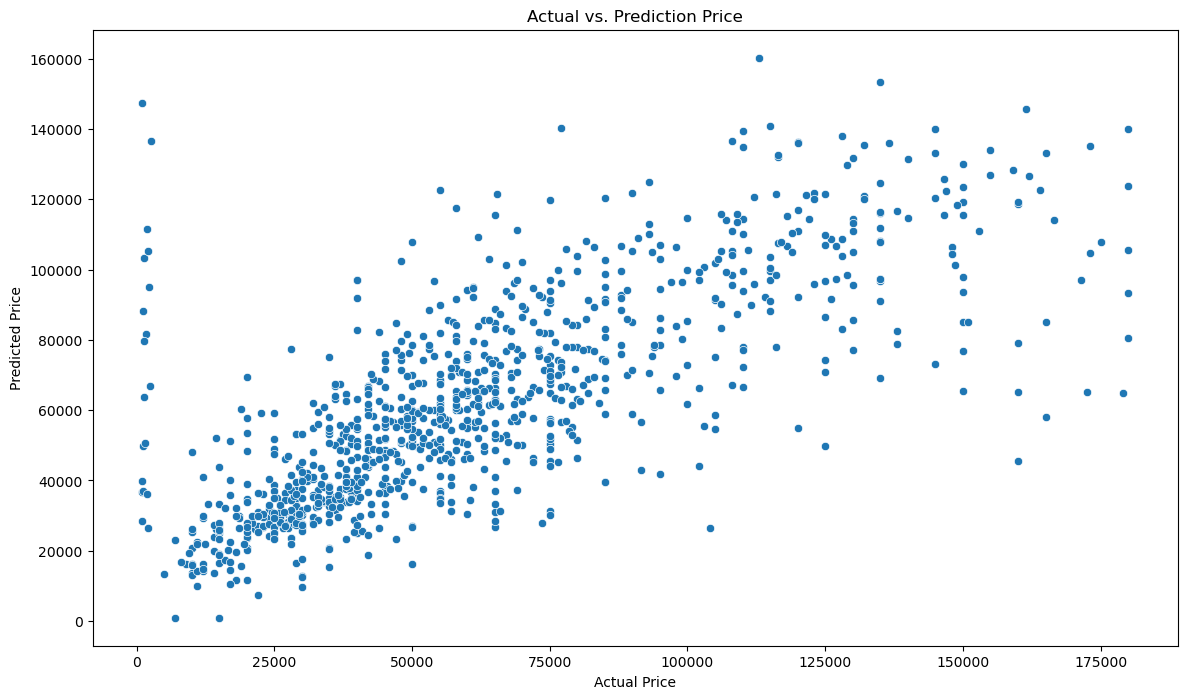

In [318]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

**The presence of large errors results in a significant difference between the RMSE and MAE values. This can also be seen in the plot, where there are actual low prices predicted much higher (overestimation) and vice versa (underestimation). However, the MAPE value obtained, which is around 29%, categorizes the model as a 'reasonable forecasting' (Lewis, 1982).**

**Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting**

## **FEATURE IMPORTANCE**

**To determine which features are the most important in influencing the target (Price), we can use the feature_importances_ function.**

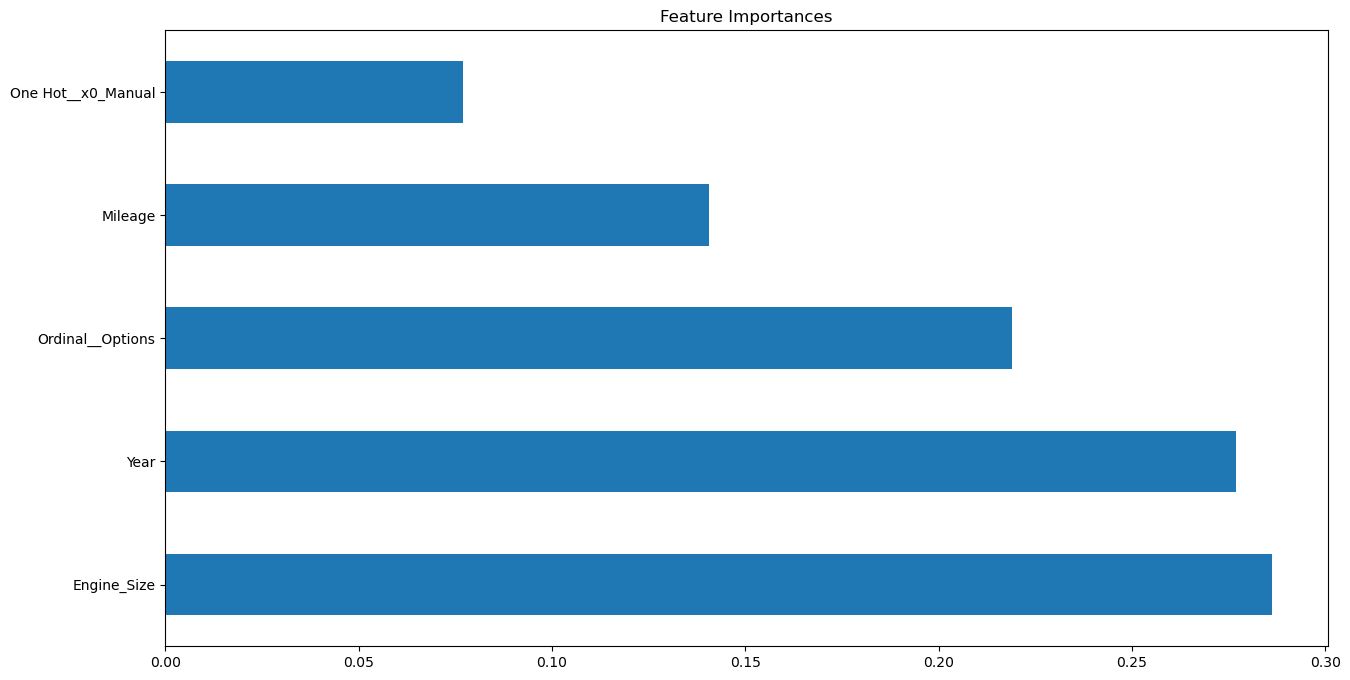

In [319]:
#  Plot Feature Importance
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

## **CONCLUSION**

**Based on the modeling that has been done, the features 'Year', 'Engine Size', 'Options', 'Mileage', and 'Gear_Type: Manual' are the most influential features on the 'price'.**

**The evaluation metrics used in the model are RMSE, MAE, and MAPE. If we look at the RMSE value generated by the model after hyperparameter tuning, it is higher than the model before hyperparameter tuning.** 

**We can conclude that if this model is used to estimate the price of used cars in Saudi Arabia in the range of values as trained by the model, the price estimate will on average deviate by approximately 247.71 from the actual price.** 

**However, it is also possible that the predictions deviate further because the bias generated by the model is still quite high when viewed from the visualization between actual and predicted prices.** 

**The bias generated by this model is due to the lack of features in the dataset that can represent other aspects of used cars being sold.**

## **Recommendation**

**Here are some things that can be done to further improve the model**:

    Check which predictions have high error values. Group the errors into overestimation and underestimation, then select the 5% most extreme errors for each group.This will create three groups: overestimation (5%), underestimation (5%), and the majority group where the error is close to the mean (90%).
    
    After that, we can check the relationship between these errors and each independent variable.Eventually, we can identify which variables and aspects are causing the high errors, and then perform retraining with other feature engineering applications.

   **If possible, add features that are more correlated with the target ('price').**

    If there is a significant amount of additional data, more complex models such as recursive neural networks (RNN) can be tried.However, if the number of data and features remains the same as in this dataset, it is unlikely to significantly improve the results.

## **SAVE MODEL**

In [320]:
# Save Model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_RegresiSaudi_XGB.sav', 'wb'))

In [324]:
# Load Model
filename = 'Model_RegresiSaudi_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [325]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

27041.91278595654

###########################################################